In [2]:
import sys
from pathlib import Path

ROOT = Path.cwd().parent          # eine Ebene über notebooks/
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation
from src.utils_stats import create_na_table, create_outlier_table, trimmed_mean

df = pd.read_csv("../data/taxi_weather_merged.csv")

Projekt-Root hinzugefügt: /Users/lukas/Library/CloudStorage/OneDrive-UniversitaetSt.Gallen/3. Semester/Statistics for Data Science/Statistic-Data-Sience-Project


# How does my dataset look like - show me some stuff?!

In [3]:
print(200*"=")
print(f"Datensatz geladen: {df.shape[0]:,} Zeilen, {df.shape[1]} Spalten")
print(200*"-")
print("Erste Zeilen:")
display(df.head(5))
print(200*"-")
print("Describe:")
display(df.describe())
print(200*"-")
print("Info:")
display(df.info())
print(200*"=")

Datensatz geladen: 309,519 Zeilen, 29 Spalten
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Erste Zeilen:


,pickup_hour,PULocationID,trip_count,mean_distance,mean_duration,mean_speed,mean_fare,mean_tip,mean_passengers,temperature_2m (°C),...,sunshine_duration (s),snowfall (mm),snow_depth (mm),hour,dow,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos
0,2023-01-01 00:00:00,12,1,3.10,10.6,17.40,12.10,3.420,1.0,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
1,2023-01-01 00:00:00,13,2,3.85,9.4,24.00,13.50,3.695,1.0,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
2,2023-01-01 00:00:00,24,1,4.30,12.2,21.30,14.20,0.000,2.0,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
3,2023-01-01 00:00:00,36,1,6.70,19.0,21.20,24.68,0.000,1.0,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
4,2023-01-01 00:00:00,41,2,1.65,6.0,13.35,7.90,1.775,1.0,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Describe:


,PULocationID,trip_count,mean_distance,mean_duration,mean_speed,mean_fare,mean_tip,mean_passengers,temperature_2m (°C),relative_humidity_2m (%),...,sunshine_duration (s),snowfall (mm),snow_depth (mm),hour,dow,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos
count,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,...,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000,309519.000000
mean,157.503320,3.125795,5.490044,15.909481,19.167070,19.191460,3.371871,1.352468,13.652866,69.860758,...,1539.196478,0.020117,0.474284,13.312033,3.056345,0.291329,-0.177241,-0.134456,-0.009342,-0.023560
std,69.458345,2.700589,5.882481,11.314627,9.558164,14.418774,3.139926,0.657890,8.779695,17.882000,...,1725.893159,0.321841,3.922718,6.254466,1.976774,0.454376,0.676622,0.701921,0.710683,0.703058
min,1.000000,1.000000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,-16.800000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-0.974928,-0.900969
25%,107.000000,1.000000,2.300000,9.350000,13.175000,11.050000,1.800000,1.000000,6.400000,56.000000,...,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,-0.866025,-0.866025,-0.781831,-0.900969
50%,151.000000,2.000000,3.433333,13.350000,16.750000,14.900000,2.837500,1.000000,13.300000,71.000000,...,0.000000,0.000000,0.000000,14.000000,3.000000,0.000000,-0.258819,-0.258819,0.000000,-0.222521
75%,231.000000,4.000000,5.800000,19.000000,22.000000,21.200000,4.087500,1.500000,21.100000,84.000000,...,3600.000000,0.000000,0.000000,18.000000,5.000000,1.000000,0.500000,0.500000,0.781831,0.623490
max,265.000000,28.000000,177.800000,597.100000,99.600000,500.000000,392.700000,8.000000,35.900000,100.000000,...,3600.000000,13.300000,60.000000,23.000000,6.000000,1.000000,1.000000,1.000000,0.974928,1.000000


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309519 entries, 0 to 309518
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pickup_hour                309519 non-null  object 
 1   PULocationID               309519 non-null  int64  
 2   trip_count                 309519 non-null  int64  
 3   mean_distance              309519 non-null  float64
 4   mean_duration              309519 non-null  float64
 5   mean_speed                 309519 non-null  float64
 6   mean_fare                  309519 non-null  float64
 7   mean_tip                   309519 non-null  float64
 8   mean_passengers            309519 non-null  float64
 9   temperature_2m (°C)        309519 non-null  float6

None

# Convert Datatypes

In [4]:
df["pickup_hour"] = pd.to_datetime(df["pickup_hour"])

print(70*"=")
print("Info:")
display(df.info())
print(70*"=")

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309519 entries, 0 to 309518
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   pickup_hour                309519 non-null  datetime64[ns]
 1   PULocationID               309519 non-null  int64         
 2   trip_count                 309519 non-null  int64         
 3   mean_distance              309519 non-null  float64       
 4   mean_duration              309519 non-null  float64       
 5   mean_speed                 309519 non-null  float64       
 6   mean_fare                  309519 non-null  float64       
 7   mean_tip                   309519 non-null  float64       
 8   mean_passengers            309519 non-null  float64       
 9   temperature_2m (°C)        309519 non-null  float64       
 10  relative_humidity_2m (%)   309519 non-null  float64       
 11  dew_point_2m (°C)          309519 non-null  fl

None

# Any missing values?

Überblick über fehlende Werte nach Spalte:


,column,n_missing,percent_missing
0,pickup_hour,0,0.0
1,PULocationID,0,0.0
2,trip_count,0,0.0
3,mean_distance,0,0.0
4,mean_duration,0,0.0
5,mean_speed,0,0.0
6,mean_fare,0,0.0
7,mean_tip,0,0.0
8,mean_passengers,0,0.0
9,temperature_2m (°C),0,0.0


--------------------------------------------------------------------------
Same thing but visualized:


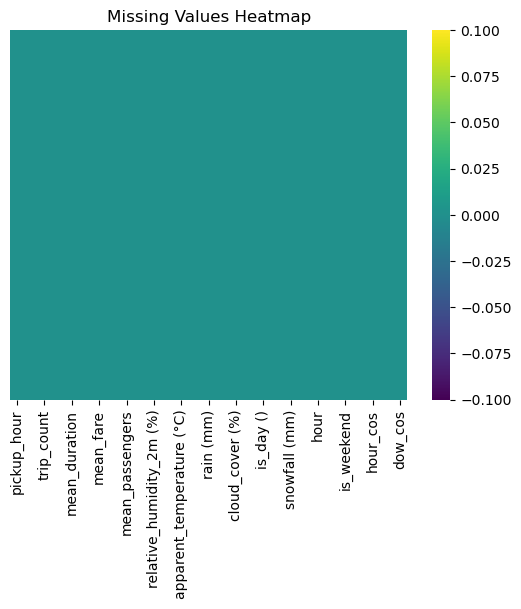

In [5]:
print(55*"=")
print("Überblick über fehlende Werte nach Spalte:")
display(create_na_table(df))

sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
print(74*"-")
print("Same thing but visualized:")
plt.show()
print(74*"=")

# Wie sind die Daten verteilt?

In [6]:
num_cols = df.select_dtypes(include="number")
lagekennzahlen_df = pd.DataFrame({
    "n": num_cols.count(),
    "Mean": num_cols.mean(),
    "Median": num_cols.median(),
    "Modus": num_cols.apply(lambda s: ", ".join(map(str, s.mode().tolist()))), # Wenn es mehrere Modi gibt diese als comma-separated Liste anzeigen
    "Trimmed Mean with 10%": num_cols.apply(lambda x: trimmed_mean(x)),
    "Min": num_cols.min(), 
    "Q1": num_cols.quantile(0.25),
    "Q3": num_cols.quantile(0.75),
    "Max": num_cols.max() 

})
format = {
    c: "{:.2f}"
    for c in lagekennzahlen_df.columns
    if pd.api.types.is_numeric_dtype(lagekennzahlen_df[c])
}

print(127*"=")
print("Überblick über Lagekennzahlen nach Spalte:")
display(lagekennzahlen_df.style.format(format))
print(127*"=")

Überblick über Lagekennzahlen nach Spalte:


,n,Mean,Median,Modus,Trimmed Mean with 10%,Min,Q1,Q3,Max
PULocationID,309519.00,157.50,151.00,132,159.97,1.00,107.00,231.00,265.00
trip_count,309519.00,3.13,2.00,1,2.61,1.00,1.00,4.00,28.00
mean_distance,309519.00,5.49,3.43,1.9,4.16,0.10,2.30,5.80,177.80
mean_duration,309519.00,15.91,13.35,9.2,14.22,0.10,9.35,19.00,597.10
mean_speed,309519.00,19.17,16.75,15.6,17.66,0.10,13.18,22.00,99.60
mean_fare,309519.00,19.19,14.90,10.0,16.34,0.10,11.05,21.20,500.00
mean_tip,309519.00,3.37,2.84,0.0,2.93,0.00,1.80,4.09,392.70
mean_passengers,309519.00,1.35,1.00,1.0,1.22,0.00,1.00,1.50,8.00
temperature_2m (°C),309519.00,13.65,13.30,6.2,13.61,-16.80,6.40,21.10,35.90
relative_humidity_2m (%),309519.00,69.86,71.00,83.0,70.71,11.00,56.00,84.00,100.00


# Wie sind die Daten gestreut?

In [7]:
# Klassische & robuste Streuungskennzahlen
streuungskennzahlen_df = pd.DataFrame({
    "SD": num_cols.std(),
    "Var": num_cols.var(),
    "IQR": num_cols.quantile(0.75) - num_cols.quantile(0.25),
    "MAD": num_cols.apply(lambda x: median_abs_deviation(x)),
    "Range": num_cols.max() - num_cols.min()
})
print(70*"=")
display(streuungskennzahlen_df.style.format("{:,.2f}"))
print(70*"=")

,SD,Var,IQR,MAD,Range
PULocationID,69.46,"4,824.46",124.00,63.00,264.00
trip_count,2.70,7.29,3.00,1.00,27.00
mean_distance,5.88,34.60,3.50,1.43,177.70
mean_duration,11.31,128.02,9.65,4.60,597.00
mean_speed,9.56,91.36,8.82,4.15,99.50
mean_fare,14.42,207.90,10.15,4.55,499.90
mean_tip,3.14,9.86,2.29,1.15,392.70
mean_passengers,0.66,0.43,0.50,0.00,8.00
temperature_2m (°C),8.78,77.08,14.70,7.30,52.70
relative_humidity_2m (%),17.88,319.77,28.00,14.00,89.00


# Haben wir Ausreißer in unseren Daten?

In [8]:
print(64*"=")
display(create_outlier_table(df))
print(64*"=")

,Spalte,Z-Score,Modified Z-Score,Tukey IQR
0,PULocationID,0,0,0
1,trip_count,5281,23339,16207
2,mean_distance,10043,35829,35165
3,mean_duration,5409,14371,19312
4,mean_speed,6823,16336,21180
5,mean_fare,8932,27625,30766
6,mean_tip,5460,16880,23494
7,mean_passengers,6434,0,21755
8,temperature_2m (°C),208,0,50
9,relative_humidity_2m (%),238,0,189


In [9]:
# Save cleaned weather (leave timezone as it is - America/New_York)
# df.to_csv("../data/taxi_weather_clean.csv", index=False)
# print("Saved to ../data/taxi_weather_clean.csv")

In [13]:
df.head(10)

,pickup_hour,PULocationID,trip_count,mean_distance,mean_duration,mean_speed,mean_fare,mean_tip,mean_passengers,temperature_2m (°C),...,sunshine_duration (s),snowfall (mm),snow_depth (mm),hour,dow,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos
0,2023-01-01,12,1,3.100000,10.600000,17.400000,12.100000,3.420000,1.000000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
1,2023-01-01,13,2,3.850000,9.400000,24.000000,13.500000,3.695000,1.000000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
2,2023-01-01,24,1,4.300000,12.200000,21.300000,14.200000,0.000000,2.000000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
3,2023-01-01,36,1,6.700000,19.000000,21.200000,24.680000,0.000000,1.000000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
4,2023-01-01,41,2,1.650000,6.000000,13.350000,7.900000,1.775000,1.000000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
5,2023-01-01,43,5,3.880000,19.080000,14.160000,18.400000,4.320000,1.800000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
6,2023-01-01,45,1,7.400000,12.200000,36.300000,21.200000,2.000000,2.000000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
7,2023-01-01,48,3,4.366667,27.933333,11.700000,25.400000,2.446667,2.333333,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
8,2023-01-01,50,3,3.900000,16.466667,12.566667,17.733333,2.390000,1.333333,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
9,2023-01-01,68,5,5.340000,19.200000,15.840000,20.500000,4.236000,1.800000,10.6,...,0.0,0.0,0.0,0,6,1,0.0,1.0,-0.781831,0.62349
